# House Prices
## Gradient Boosting Regressor



Questo progetto si concentra sull'analisi e la modellizzazione dei dati relativi al THouse Price. Il progetto include i seguenti passaggi:

  - Esplorazione dei Dati: Analisi iniziale per comprendere la struttura del dataset, inclusi tipi di dati, statistiche descrittive e verifica di eventuali        valori mancanti.

  - Visualizzazione dei Dati: Creazione di grafici per visualizzare la distribuzione delle variabili, come istogrammi, boxplot e heatmap di correlazione.

  - Pulizia dei Dati: Rimozione di colonne non necessarie e gestione di eventuali anomalie nei dati.

  -  Scaling delle Caratteristiche: Normalizzazione delle variabili numeriche per migliorare le prestazioni dei modelli di machine learning.

   - Modellizzazione: Utilizzo di algoritmi di regressione.

- Valutazione del Modello

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("dataset/train.csv", encoding='utf-8')


In [3]:
df_test = pd.read_csv("dataset/test.csv", encoding='utf-8')


In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## DATA VISUALIZATION

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
df = df .drop(columns=['Street', 'Utilities',])

In [9]:
columns_d = df.select_dtypes(include=['object']).columns.tolist()

# Stampa il risultato
print(columns_d)

['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


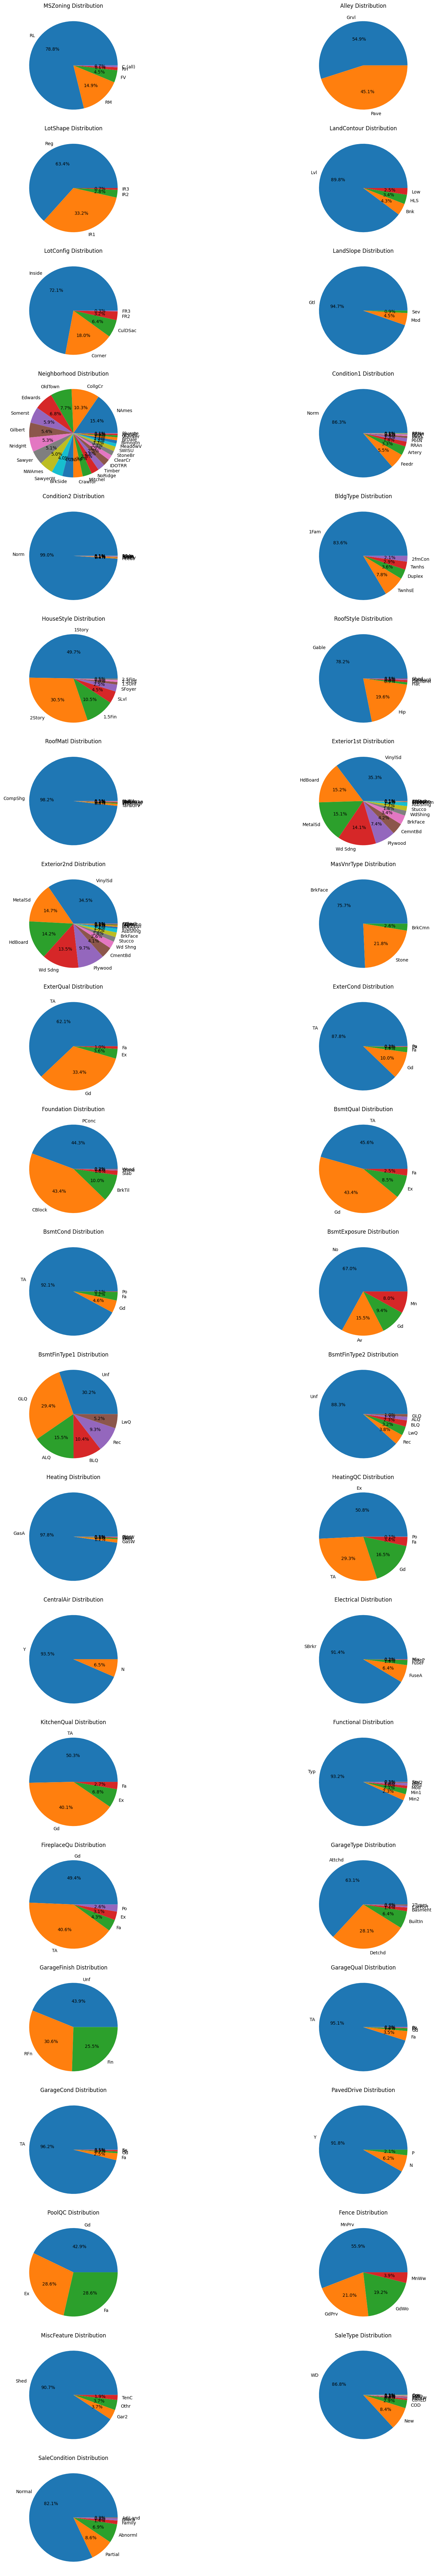

In [10]:

# Creazione della figura e degli assi con 2 colonne
fig, axs = plt.subplots(nrows=len(columns_d) // 2 + len(columns_d) % 2, ncols=2, figsize=(20, 80))

# Flatten degli assi per facilitarne l'iterazione
axs = axs.flatten()

for i, col in enumerate(columns_d):
    counts = df[col].value_counts()
    axs[i].pie(counts, labels=counts.index.astype(str), autopct='%1.1f%%')
    axs[i].set_title(f'{col} Distribution')

# Rimozione degli assi non utilizzati (nel caso di un numero dispari di colonne)
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

In [11]:
# Ottieni le colonne con dtype 'int' e 'float'
columns_s = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Stampa il risultato
print(columns_s)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


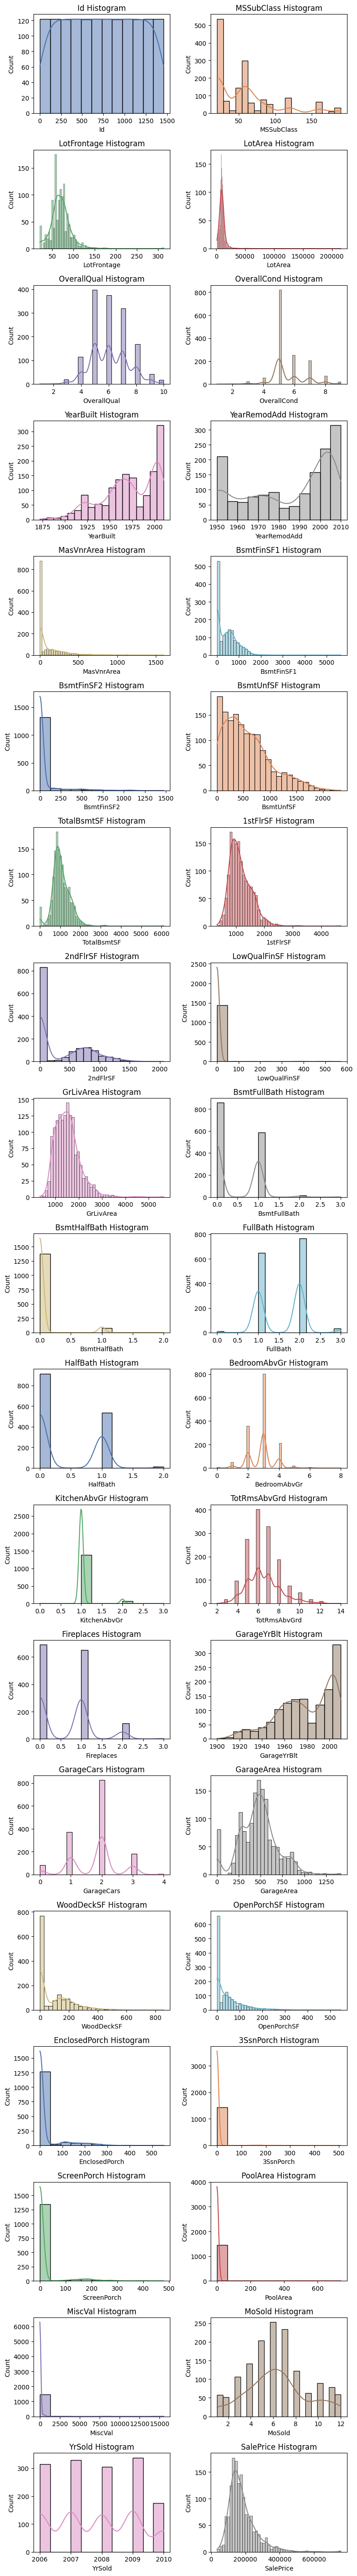

In [12]:
# Numero di colonne per riga
n_cols = 2
n_rows = (len(columns_s) + n_cols - 1) // n_cols  # Calcolo il numero di righe necessarie

# Creazione di una griglia di sottotrame
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8, 3 * n_rows))

# Appiattire l'array di assi per iterare facilmente
axs = axs.flatten()

# Genera una palette di colori diversi
colors = sns.color_palette("deep", len(columns_s))  

# Ciclo per generare un istogramma per ogni colonna con colori differenti
for i, (col, color) in enumerate(zip(columns_s, colors)):
    sns.histplot(df[col], kde=True, ax=axs[i], color=color)  # Grafico dell'istogramma con KDE
    axs[i].set_title(f'{col} Histogram')  # Titolo con il nome della colonna
    axs[i].set_xlabel(col)  # Etichetta asse X con il nome della colonna
    axs[i].set_ylabel('Count')  # Etichetta asse Y come Conteggio

# Rimuove eventuali sottotrame vuote nel caso in cui il numero di grafici sia dispari
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()  # Aggiusta gli spazi tra i grafici
plt.show()

## CLEANING E PREPROCESSING


In [13]:
df_test = df_test .drop(columns=['Street', 'Utilities',])

In [14]:
df['Alley'] = df['Alley'].fillna('NA')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2']] = df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].fillna('NA')
df['MasVnrType'] = df['MasVnrType'].fillna('no')
df['Electrical'] = df['Electrical'].fillna('SBrkr')
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')
df['PoolQC'] = df['PoolQC'].fillna('NA')
df['GarageQual'] = df['GarageQual'].fillna('NA')
df['GarageCond'] = df['GarageCond'].fillna('NA')
df['GarageType' ] = df['GarageType'].fillna('NA')
df[ 'GarageFinish' ] = df[ 'GarageFinish'].fillna('NA')
df[ 'Fence' ] = df[ 'Fence'].fillna('NA')
df[ 'MiscFeature' ] = df[ 'MiscFeature'].fillna('Na')


In [15]:
# Sostituzione dei NaN con 0
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)

# Stampa il DataFrame per verificare
print(df['GarageYrBlt'].isna().sum())  # Dovrebbe stampare 0

0


In [16]:
imputer = KNNImputer(n_neighbors=5)
df[['LotFrontage']] = imputer.fit_transform(df[['LotFrontage']])

In [17]:

# Supponiamo che il tuo DataFrame si chiami df
# Seleziona le colonne di tipo 'object'


# Crea un'istanza di LabelEncoder
label_encoder = LabelEncoder()

# Codifica ogni colonna nella lista columns_d
for col in columns_d:
    df[col] = label_encoder.fit_transform(df[col])

# Mostra il DataFrame modificato
print(df)

        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Alley  LotShape  \
0        1          60         3         65.0     8450      1         3   
1        2          20         3         80.0     9600      1         3   
2        3          60         3         68.0    11250      1         0   
3        4          70         3         60.0     9550      1         0   
4        5          60         3         84.0    14260      1         0   
...    ...         ...       ...          ...      ...    ...       ...   
1455  1456          60         3         62.0     7917      1         3   
1456  1457          20         3         85.0    13175      1         3   
1457  1458          70         3         66.0     9042      1         3   
1458  1459          20         3         68.0     9717      1         3   
1459  1460          20         3         75.0     9937      1         3   

      LandContour  LotConfig  LandSlope  ...  PoolArea  PoolQC  Fence  \
0               3         

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int64  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Alley          1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [20]:
col_test_d = df_test.select_dtypes(include=['object']).columns.tolist()

In [21]:

# Supponiamo che il tuo DataFrame si chiami df
# Seleziona le colonne di tipo 'object'


# Crea un'istanza di LabelEncoder
label_encoder = LabelEncoder()

# Codifica ogni colonna nella lista columns_d
for colt in col_test_d:
    df_test[colt] = label_encoder.fit_transform(df_test[colt])

# Mostra il DataFrame modificato
print(df_test)

        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Alley  LotShape  \
0     1461          20         2         80.0    11622      2         3   
1     1462          20         3         81.0    14267      2         0   
2     1463          60         3         74.0    13830      2         0   
3     1464          60         3         78.0     9978      2         0   
4     1465         120         3         43.0     5005      2         0   
...    ...         ...       ...          ...      ...    ...       ...   
1454  2915         160         4         21.0     1936      2         3   
1455  2916         160         4         21.0     1894      2         3   
1456  2917          20         3        160.0    20000      2         3   
1457  2918          85         3         62.0    10441      2         3   
1458  2919          60         3         74.0     9627      2         3   

      LandContour  LotConfig  LandSlope  ...  ScreenPorch  PoolArea  PoolQC  \
0               3   

## 

## MODELING  Gradient Boosting Regressor

In [22]:
x, y = df.iloc[:,:-1], df.iloc[:,-1]
print(y)
print(x)

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64
        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Alley  LotShape  \
0        1          60         3         65.0     8450      1         3   
1        2          20         3         80.0     9600      1         3   
2        3          60         3         68.0    11250      1         0   
3        4          70         3         60.0     9550      1         0   
4        5          60         3         84.0    14260      1         0   
...    ...         ...       ...          ...      ...    ...       ...   
1455  1456          60         3         62.0     7917      1         3   
1456  1457          20         3         85.0    13175      1         3   
1457  1458          70         3         66.0     9042      1         3   
1458  1459          20         3         

In [23]:
print(x.shape)  # Dimensioni del set di feature
print(y.shape)

(1460, 78)
(1460,)


In [28]:
# Suddividere i dati
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.29, random_state = 42)

In [29]:
# Normalizzazione
scaler = StandardScaler()  
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [30]:
# Inizializzare e addestrare il modello
model = HistGradientBoostingRegressor()
model.fit(x_train, y_train)

# Fare previsioni sul set di test
y_pred = model.predict(x_test)

## Valutazione  modello

In [31]:
# Valutare il modello
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 706970978.5530456
Root Mean Squared Error: 26588.92586309281
R^2 Score: 0.8974881382033585


Mean Squared Error: 706970978.5530456
R^2 Score: 0.8974881382033585


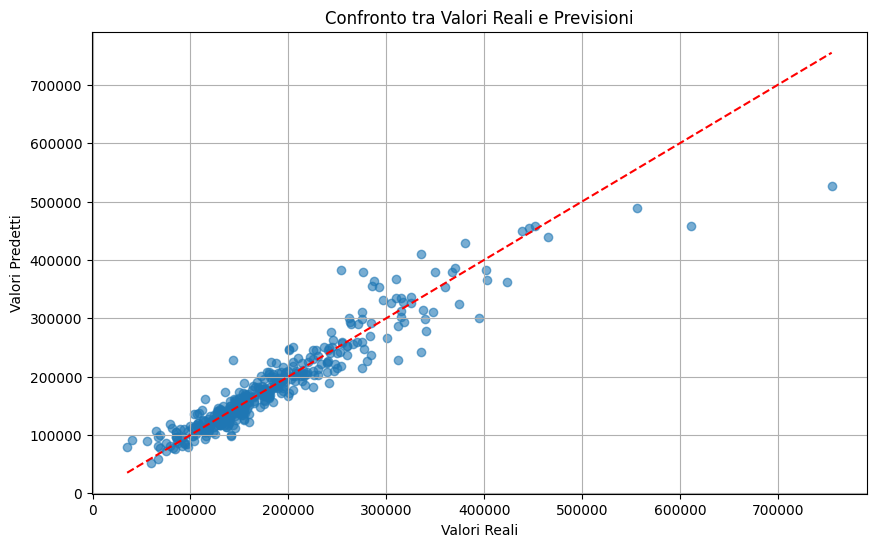

In [32]:
import matplotlib.pyplot as plt

# Fare previsioni sul set di test
y_pred = model.predict(x_test)

# Valutare il modello
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Plot dei risultati
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Confronto tra Valori Reali e Previsioni')
plt.xlabel('Valori Reali')
plt.ylabel('Valori Predetti')
plt.grid()
plt.show()


## Esportazione previsioni di x_test

In [ ]:
 df_test = pd.read_csv('tuo_file_di_test.csv')

# Applica lo stesso scaler usato durante l'addestramento
x_test_new = scaler.transform(df_test)

# Fare previsioni su df_test
predictions = model.predict(x_test_new)

# Salva o visualizza le previsioni
df_test['SalePrice'] = predictions
# Seleziona solo le colonne ID e Predicted_SalePrice
result = df_test[['Id', 'SalePrice']]

# Salva il risultato in un file CSV
result.to_csv('predic_gb_sc.csv', index=False)

print("Previsioni completate e salvate in 'predic_gb_sc.csv'")

Previsioni completate e salvate in 'predic_gb_sc.csv'
